In [1]:
import numpy as np
import pandas as pd

In [5]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_50k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [6]:
list(dataset.columns)

['establishment_code',
 'sex',
 'ethnicity',
 'marital_status',
 'interpreter_required',
 'employment_status',
 'occupation',
 'triage_category',
 'visit_type',
 'mode_of_arrival',
 'referral_source',
 'primary_diagnosis',
 'presenting_complaint',
 'major_diagnostic_category',
 'human_intent_of_injury',
 'feeder_system',
 'external_cause_of_injury',
 'state',
 'claim_type',
 'treating_doctor_type',
 'senior_doctor_type',
 'ambulance_number',
 'statistical_area_2_2016',
 'payment_classification',
 'aboriginality',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'additional_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'australian_postcode',
 'metropolitan_hospital_flag',
 'rural_hospital_flag',
 'local_health_network',
 'attendance_length_of_episode',
 'attendance',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_ho

In [7]:
dataset.shape

(50000, 68)

In [8]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47500, 68)
Unseen Data For Predictions: (2500, 68)


In [9]:
from pycaret.classification import *

In [10]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         ignore_features=['reattendance_within_48_hours_for_the_same_condition', 
                                          'admission_with_length_of_episode_less_than_or_equal_to_4_hours',
 'admission_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
                                         'departure_with_length_of_episode_less_than_or_equal_to_4_hours'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode','primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         bin_numeric_features = ['age'],
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(47500, 68)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,60
8,Ordinal Features,True
9,High Cardinality Features,True


In [63]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9592,0.9903,0.9742,0.8851,0.9275,0.8992,0.9012,24.7180
gbc,Gradient Boosting Classifier,0.9569,0.9903,0.9910,0.8671,0.9249,0.8949,0.8988,30.3960
ridge,Ridge Classifier,0.9523,0.0000,0.9271,0.8982,0.9124,0.8796,0.8799,10.3510
dt,Decision Tree Classifier,0.9425,0.9290,0.8998,0.8871,0.8934,0.8541,0.8541,1.6250
et,Extra Trees Classifier,0.9395,0.9828,0.8737,0.8975,0.8854,0.8443,0.8445,14.7370
rf,Random Forest Classifier,0.9333,0.9813,0.8443,0.9005,0.8714,0.8265,0.8273,8.9110
nb,Naive Bayes,0.7323,0.5950,0.0000,0.0000,0.0000,0.0000,0.0000,2.5340
dummy,Dummy Classifier,0.7323,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2380
knn,K Neighbors Classifier,0.7185,0.6826,0.3351,0.4645,0.3892,0.2125,0.2174,18.7950
svm,SVM - Linear Kernel,0.5000,0.0000,0.5000,0.1338,0.2112,0.0000,0.0000,25.1670


In [64]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9591,0.9881,0.9753,0.8839,0.9274,0.8990,0.9011
1,0.9558,0.9895,0.9764,0.8734,0.9220,0.8913,0.8940
2,0.9594,0.9904,0.9697,0.8888,0.9275,0.8993,0.9010
3,0.9585,0.9909,0.9753,0.8821,0.9264,0.8976,0.8998
4,0.9573,0.9904,0.9764,0.8778,0.9245,0.8948,0.8973
5,0.9582,0.9900,0.9719,0.8836,0.9256,0.8966,0.8986
6,0.9600,0.9914,0.9753,0.8866,0.9288,0.9011,0.9031
7,0.9618,0.9912,0.9719,0.8945,0.9316,0.9052,0.9067
8,0.9597,0.9907,0.9742,0.8865,0.9283,0.9003,0.9023


In [65]:
print(ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [66]:
tuned_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9603,0.9887,0.9899,0.8775,0.9303,0.9027,0.9059
1,0.9543,0.9898,0.9820,0.8653,0.9200,0.8882,0.8917
2,0.9585,0.9909,0.9899,0.8723,0.9274,0.8985,0.9020
3,0.9585,0.9908,0.9933,0.8701,0.9276,0.8987,0.9026
4,0.9561,0.9904,0.9899,0.8654,0.9235,0.8929,0.8968
5,0.9579,0.9901,0.9876,0.8720,0.9262,0.8969,0.9003
6,0.9582,0.9919,0.9888,0.8722,0.9268,0.8977,0.9012
7,0.9612,0.9921,0.9888,0.8809,0.9317,0.9047,0.9077
8,0.9630,0.9909,0.9966,0.8808,0.9352,0.9094,0.9128


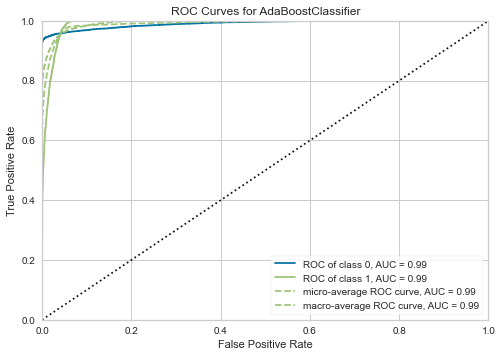

In [67]:
plot_model(tuned_ada, plot = 'auc')

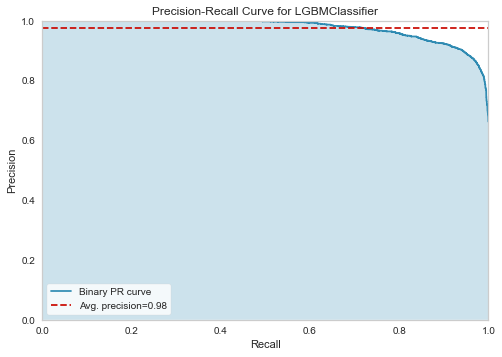

In [56]:
plot_model(tuned_ada, plot = 'pr')

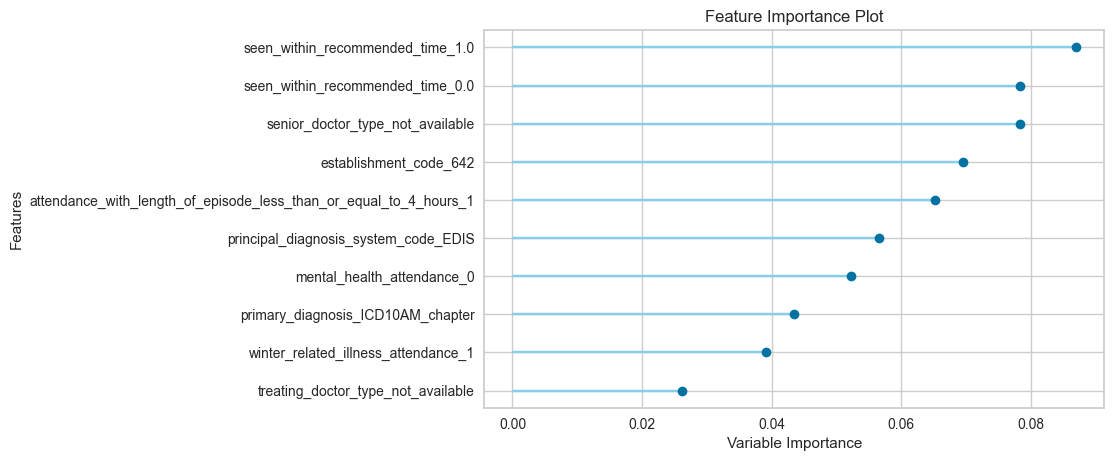

In [68]:
plot_model(tuned_ada, plot='feature')

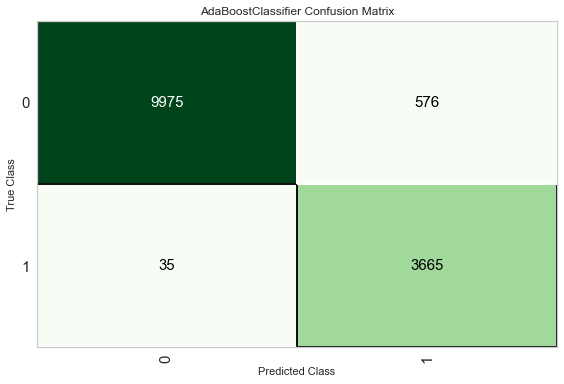

In [69]:
plot_model(tuned_ada, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [70]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [71]:
predict_model(tuned_ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9571,0.9905,0.9905,0.8642,0.9231,0.8935,0.8975


,occupation,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,establishment_code_101,establishment_code_104,...,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,age_9.0,admission,Label,Score
0,115.666252,3.0,81.0,75.0,507051200.0,8258.0,70.0,697.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6673
1,115.666252,2.0,1780.0,644.0,506021120.0,1817.0,1780.0,240.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7011
2,115.666252,4.0,1246.0,418.0,506041120.0,6631.0,374.0,235.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.5890
3,115.666252,2.0,1780.0,644.0,505011072.0,1817.0,1780.0,617.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6736
4,115.666252,2.0,73.0,40.0,506041120.0,1927.0,58.0,235.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.5055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,115.666252,4.0,1758.0,30.0,503021056.0,1758.0,1758.0,205.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5044
14247,115.666252,3.0,18.0,11.0,507031168.0,6631.0,18.0,562.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5846
14248,115.666252,1.0,234.0,117.0,506061152.0,1927.0,131.0,465.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6308
14249,115.666252,2.0,58.0,39.0,501021024.0,191.0,43.0,984.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6956


In [72]:
final_ada = finalize_model(tuned_ada)

In [73]:
#Final ADA parameters for deployment
print(final_ada)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)


In [76]:
unseen_predictions = predict_model(final_ada, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9560,0.9896,0.9914,0.8697,0.9266,0.8953,0.8993


,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,mode_of_arrival,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,277,1,4,5,2,7.0,NaN,4,1,3,...,0,0,0,0,0,NaN,83,0,0,0.5192
1,208,1,1,1,2,8.0,NaN,2,15,3,...,0,0,0,0,0,NaN,34,0,1,0.5050
2,105,2,4,3,2,7.0,NaN,2,1,3,...,0,0,0,0,0,NaN,82,0,1,0.5020
3,645,2,4,1,2,8.0,NaN,4,1,1,...,0,0,0,0,0,NaN,48,0,0,0.5945
4,105,2,4,1,2,2.0,NaN,3,1,1,...,0,0,0,0,0,NaN,21,0,0,0.5058


In [84]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
5,0,1
6,0,0
7,0,1
8,0,0
9,0,0


In [77]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.956